In [13]:
import re
import csv
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# Read Dataset
train_dataset = pd.read_csv('./Data/Gejala_Penyakit_Train.csv')
test_dataset = pd.read_csv('./Data/Gejala_Penyakit_Test.csv')

In [4]:
# Data Preparation 
# Split Data fitur/gejala (x) dan label/penyakit (y)
cols_train= train_dataset.columns
cols_train= cols_train[:-1]
cols_test= test_dataset.columns
cols_test= cols_test[:-1]
x_train = train_dataset[cols_train]
y_train = train_dataset['Prognosis']
x_test = test_dataset[cols_test]
y_test = test_dataset['Prognosis']


In [5]:
label_encoder = LabelEncoder()
# Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)
# Transform labels to normalized encoding.
y_test = label_encoder.transform(y_test)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(len(cols_train),)), # Ada 118 kelas gejala
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(set(y_train)), activation='softmax') # Ada 47 kelas penyakit
])

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=600, batch_size=32, verbose=1)

Epoch 1/600
15/15 [==============================] - 7s 11ms/step - loss: 3.7675 - accuracy: 0.0989
Epoch 2/600
15/15 [==============================] - 0s 17ms/step - loss: 3.4602 - accuracy: 0.3895
Epoch 3/600
15/15 [==============================] - 0s 14ms/step - loss: 3.0389 - accuracy: 0.5853
Epoch 4/600
15/15 [==============================] - 0s 29ms/step - loss: 2.4414 - accuracy: 0.7242
Epoch 5/600
15/15 [==============================] - 0s 24ms/step - loss: 1.7477 - accuracy: 0.8926
Epoch 6/600
15/15 [==============================] - 0s 21ms/step - loss: 1.1178 - accuracy: 0.9537
Epoch 7/600
15/15 [==============================] - 0s 24ms/step - loss: 0.6797 - accuracy: 0.9853
Epoch 8/600
15/15 [==============================] - 0s 26ms/step - loss: 0.4186 - accuracy: 0.9853
Epoch 9/600
15/15 [==============================] - 0s 19ms/step - loss: 0.2777 - accuracy: 0.9937
Epoch 10/600
15/15 [==============================] - 0s 19ms/step - loss: 0.1951 - accuracy: 0.9937

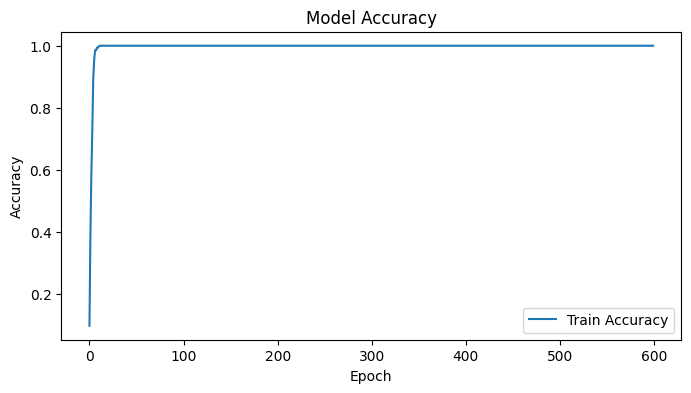

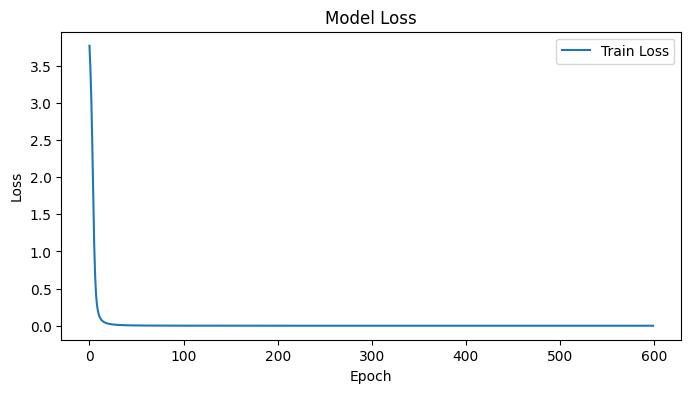

In [14]:
# # Evaluate Model to testing dataset
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)
# print('Test loss:', test_loss)

# Extract accuracy and loss values from the training history
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']


# Plot accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(train_accuracy, label='Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.figure(figsize=(8, 4))
plt.plot(train_loss, label='Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# Try Predict to X_test data samples
# new_samples = np.array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

new_samples = x_test[:5]
predictions = model.predict(new_samples)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes = label_encoder.inverse_transform(predicted_classes)  # Mengembalikan label penyakit ke bentuk semula
print('Predicted classes:', predicted_classes)

1/1 [==============================] - 1s 684ms/step
Predicted classes: ['Hipersomnia' 'Insomnia' 'Jet Lag' 'Bintitan' 'Katarak']


In [15]:

# Save the vectorizer and label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the saved model
saved_model_path = "./diseasePredict.h5"
model.save(saved_model_path)
